In [2]:
# TODO: Make sure you run this cell before continuing!

%matplotlib inline
import matplotlib.pyplot as plt

def show_plot(x_datas, y_datas, x_label, y_label, legend=None, title=None):
    """
    Display a simple line plot.
    
    :param x_data: Numpy array containing data for the X axis
    :param y_data: Numpy array containing data for the Y axis
    :param x_label: Label applied to X axis
    :param y_label: Label applied to Y axis
    """
    fig = plt.figure(figsize=(16,8), dpi=100)
    for (x_data, y_data) in zip(x_datas, y_datas):
        plt.plot(x_data, y_data, '-', marker='|', markersize=2.0, mfc='b')
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.xlabel(x_label)
    fig.autofmt_xdate()
    plt.ylabel (y_label)
    if legend:
        plt.legend(legend, loc='upper left')
    if title:
        plt.title(title)
    plt.show()
    return plt
    
def plot_box(bbox):
    """
    Display a Green bounding box on an image of the blue marble.
    
    :param bbox: Shapely Polygon that defines the bounding box to display
    """
    min_lon, min_lat, max_lon, max_lat = bbox.bounds
    import matplotlib.pyplot as plt1
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap

    map = Basemap()
    map.bluemarble(scale=0.5)
    poly = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),
                    (max_lon,min_lat)],facecolor=(0,0,0,0.0),edgecolor='green',linewidth=2)
    plt1.gca().add_patch(poly)
    plt1.gcf().set_size_inches(15,25)
    
    plt1.show()
    
def show_plot_two_series(x_data_a, x_data_b, y_data_a, y_data_b, x_label, y_label_a, 
                         y_label_b, series_a_label, series_b_label, align_axis=True):
    """
    Display a line plot of two series
    
    :param x_data_a: Numpy array containing data for the Series A X axis
    :param x_data_b: Numpy array containing data for the Series B X axis
    :param y_data_a: Numpy array containing data for the Series A Y axis
    :param y_data_b: Numpy array containing data for the Series B Y axis
    :param x_label: Label applied to X axis
    :param y_label_a: Label applied to Y axis for Series A
    :param y_label_b: Label applied to Y axis for Series B
    :param series_a_label: Name of Series A
    :param series_b_label: Name of Series B
    :param align_axis: Use the same range for both y axis
    """
    
    fig, ax1 = plt.subplots(figsize=(10,5), dpi=100)
    series_a, = ax1.plot(x_data_a, y_data_a, 'b-', marker='|', markersize=2.0, mfc='b', label=series_a_label)
    ax1.set_ylabel(y_label_a, color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(min(0, *y_data_a), max(y_data_a)+.1*max(y_data_a))
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()
    series_b, = ax2.plot(x_data_b, y_data_b, 'r-', marker='|', markersize=2.0, mfc='r', label=series_b_label)
    ax2.set_ylabel(y_label_b, color='r')
    ax2.set_ylim(min(0, *y_data_b), max(y_data_b)+.1*max(y_data_b))
    ax2.tick_params('y', colors='r')
    
    if align_axis:
        axis_min = min(0, *y_data_a, *y_data_b)
        axis_max = max(*y_data_a, *y_data_b)
        axis_max += .1*axis_max
        
        ax1.set_ylim(axis_min, axis_max)
        ax2.set_ylim(axis_min, axis_max)
    
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.legend(handles=(series_a, series_b), bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
    plt.show()


# Step 2: Run a Daily Difference Average (Anomaly) calculation

Target set to http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083


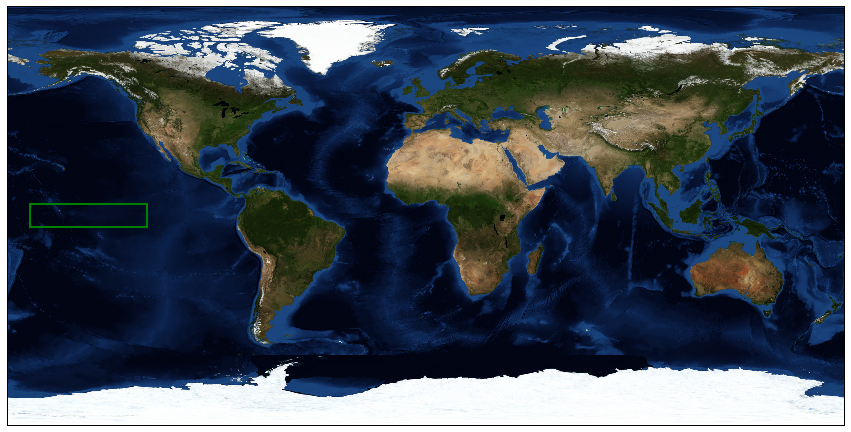

Daily Difference Average took 13.180076701566577 seconds to generate


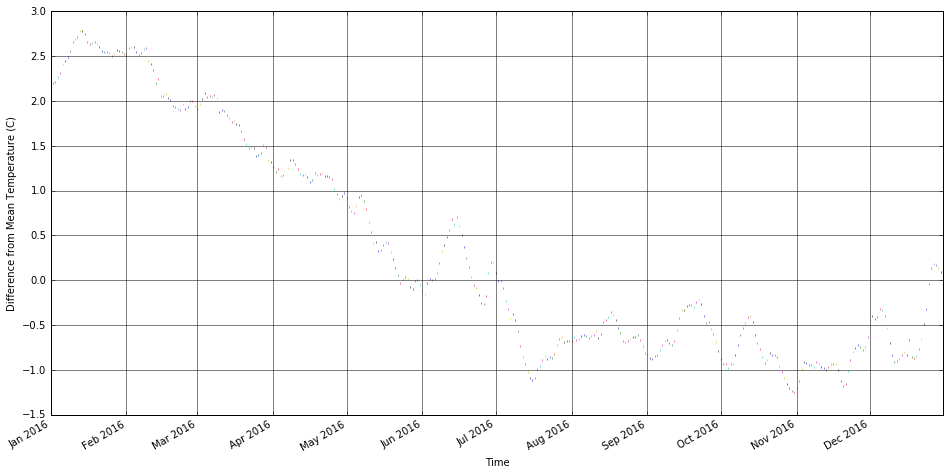

<module 'matplotlib.pyplot' from '/usr/local/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [3]:
# Answer to Advanced challenge

import time
import nexuscli
from datetime import datetime

from shapely.geometry import box

nexuscli.set_target("http://ec2-35-163-71-211.us-west-2.compute.amazonaws.com:8083", use_session=False)
bbox = box(-170, -5, -120, 5)
plot_box(bbox)

start = time.perf_counter()


dataset = "AVHRR_OI_L4_GHRSST_NCEI"
start_time = datetime(2016, 1, 1)
end_time = datetime(2016, 12, 31)
dda = nexuscli.daily_difference_average(dataset, bbox, start_time, end_time)

print("Daily Difference Average took {} seconds to generate".format(time.perf_counter() - start))

avhrr_dda = dda[0]
show_plot(avhrr_dda.time, avhrr_dda.mean, 'Time', 'Difference from Mean Temperature (C)')

# Step 3: Clean up the Output


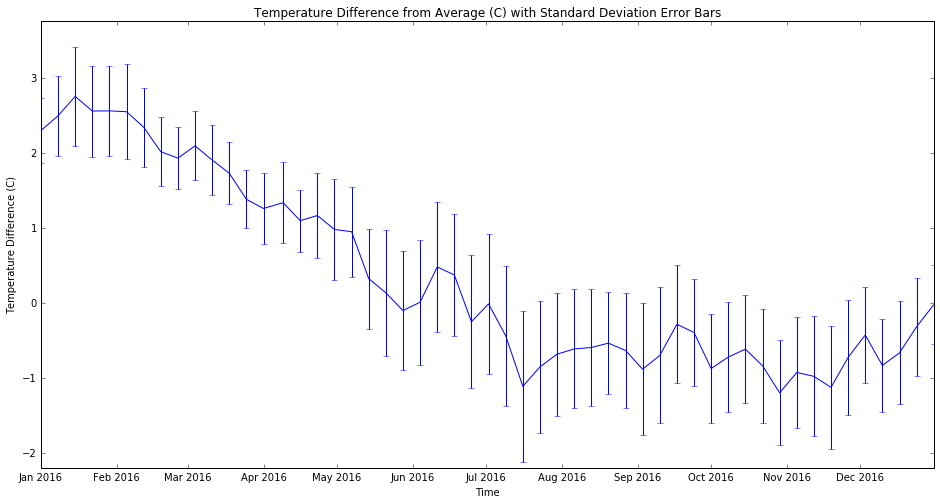

In [5]:
# TODO Sample every 7th data point to reduce plot noise
means, dates, st_ds = avhrr_dda.mean[0::7], avhrr_dda.time[0::7], avhrr_dda.standard_deviation[0::7]

# TODO Plot the extracted means with standard deviation shown as error bars
plt.figure(figsize=(16,8), dpi=100)
lines = plt.errorbar(dates, means, st_ds)
plt.xlim(dates[0], dates[-1])
plt.xlabel('Time')
plt.ylim(min(means)-1, max(means)+1)
plt.ylabel ('Temperature Difference (C)')
plt.title('Temperature Difference from Average (C) with Standard Deviation Error Bars', fontsize=12)
plt.show()